In [56]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [61]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [81]:
from sqlalchemy import inspect
inspection = inspect(engine)
inspection.get_table_names()
test = inspection.get_columns("measurement")
for t in test:
    print(t)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


# Exploratory Precipitation Analysis

In [64]:
# Find the most recent date in the data set.
recentdata = session.query(Measurement.date) \
    .order_by(Measurement.date.desc()).first()
recentdata

('2017-08-23')

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last12mon = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23") \
    .order_by(Measurement.date.desc()).all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
# precip = session.query(Measurement.prcp).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
new_df = pd.DataFrame(last12mon, columns=["date", "precipitation"])
new_df

,date,precipitation
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [66]:
# Sort the dataframe by date
sort_df = new_df.sort_values(by="date")
sort_df = sort_df.reset_index(drop=True)
sort_df = sort_df.dropna()
sort_df.head()

,date,precipitation
0,2016-08-23,0.70
1,2016-08-23,0.00
2,2016-08-23,0.15
3,2016-08-23,1.79
5,2016-08-23,0.02


Text(0, 0.5, 'Precipitation')

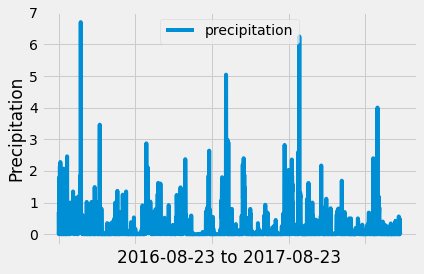

In [67]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot()
plt.xlabel("2016-08-23 to 2017-08-23")
plt.xticks(visible = False)
plt.ylabel("Precipitation")

In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number stations in the dataset
num_station = session.query(Station.station).count()
num_station

9

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestations = session.query(Measurement.station,
                              func.count(Measurement.date)) \
    .group_by(Measurement.station).order_by(func.count(Measurement.date).desc()) \
    .all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top1 = session.query(Measurement.station, Measurement.date, Measurement.tobs) \
    .filter(Measurement.station == 'USC00519281').all()
top1

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

In [107]:
mindata = session.query(Measurement.station, func.min(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').all()
min = mindata[0][1]
min

54.0

In [108]:
maxdata = session.query(Measurement.station, func.max(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').all()
max = maxdata[0][1]
max

85.0

In [109]:
avgdata = session.query(Measurement.station, func.avg(Measurement.tobs)) \
    .filter(Measurement.station == 'USC00519281').all()
avg = avgdata[0][1]
avg

71.66378066378067

In [127]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12montemp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= "2016-08-23").all()
last12montemp

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

<AxesSubplot:ylabel='Frequency'>

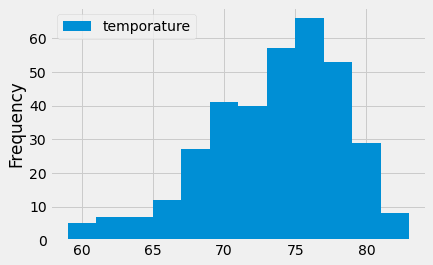

In [129]:
temp_df = pd.DataFrame(last12montemp, columns=['station','date','temporature'])
temp_df.plot(kind='hist', bins=12)

# Close session

In [130]:
# Close Session
session.close()